# 6.3 Geographic Visualization 

### This script contains the following: 

#### 1. Import data and libraries
#### 2. Data wrangling - checking outliers
#### 3. New Variable for Installations by Size
#### 4. Plotting a choropleth
#### 5. Insights for Analysis

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for New York State cities 

county_geo = r'C:\Users\isobr\OneDrive\02052023Solar Programs NY\01. Original data/cugir-007865-geojson.json'

In [4]:
# look at the JSON file contents:

f = open(r'C:\Users\isobr\OneDrive\02052023Solar Programs NY\01. Original data/cugir-007865-geojson.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'cugir007865.1', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-74.712396, 44.953008], [-74.711132, 44.953008], [-74.691251, 44.953], [-74.690671, 44.952909], [-74.689482, 44.9529], [-74.668382, 44.952777], [-74.667773, 44.95277], [-74.641872, 44.952621], [-74.636018, 44.910792], [-74.635172, 44.904471], [-74.63121, 44.875391], [-74.63048, 44.869393], [-74.629994, 44.865378], [-74.629519, 44.861096], [-74.629231, 44.859404], [-74.628731, 44.857004], [-74.628559, 44.856249], [-74.626236, 44.838506], [-74.625049, 44.830346], [-74.62294, 44.815154], [-74.622615, 44.812766], [-74.622537, 44.812195], [-74.621928, 44.807683], [-74.619921, 44.792855], [-74.617402, 44.774552], [-74.614223, 44.752374], [-74.613318, 44.74575], [-74.610841, 44.72708], [-74.607362, 44.703708], [-74.604547, 44.686315], [-74.602938, 44.67662], [-74.589474, 44.598732], [-74.571215, 44.470241], [-74.570132, 44.463396], [-74.55863, 44.385142], [-74.557046, 44.372935], [-74.5535, 44.3

In [5]:
path = r'C:\Users\isobr\OneDrive\02052023Solar Programs NY'

In [6]:
# Import the solar projects data

df = pd.read_pickle(os.path.join(path, '02. Prepared data','solar_power_clean.pkl'))

In [7]:
df.head()

,index,project_number,city,county,state,zip_code,sector,program_type,electric_utility,purchase_type,...,project_status,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,affordable_solar,community_distributed_generation,location_data
0,0,5137-49041,Maine,Broome,NY,13802,Residential,Residential/Small Commercial,NYS Electric and Gas,Lease,...,Complete,2.0,40.0,41800.00,6930.0,10.00,11738.0,False,False,"Maine, NY 13802\n(42.240938, -76.047937)"
1,1,5137-46019,Levittown,Nassau,NY,11756,Residential,Residential/Small Commercial,PSEG Long Island,Lease,...,Complete,1.0,28.0,30940.00,2520.0,7.00,8217.0,False,False,"Levittown, NY 11756\n(40.725845, -73.517198)"
2,2,5137-52151,Cortland,Cortland,NY,13045,Residential,Residential/Small Commercial,National Grid,Lease,...,Complete,2.0,49.0,48387.50,11025.0,12.25,14380.0,False,False,"Cortland, NY 13045\n(42.588691, -76.185061)"
3,3,5129-94109,Staten Island,Richmond,NY,10314,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,...,Complete,1.0,15.0,23509.54,2943.0,4.91,5758.0,False,False,"Staten Island, NY 10314\n(40.604049, -74.152798)"
4,4,5137-46454,Warwick,Orange,NY,10990,Residential,Residential/Small Commercial,Orange and Rockland Utilities,Lease,...,Complete,1.0,22.0,25283.00,5720.0,5.72,6714.0,False,False,"Warwick, NY 10990\n(41.263165, -74.365461)"


In [8]:
df.shape

(75564, 21)

### 2. Data Wrangling - checking outliers

In [9]:
df.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation',
       'location_data'],
      dtype='object')

##### Extreme values checks

<AxesSubplot:xlabel='kw_dc', ylabel='Count'>

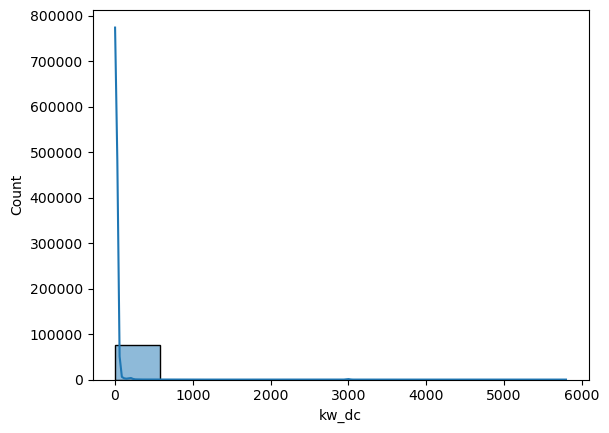

In [10]:
sns.histplot(df['kw_dc'], bins=10, kde = True) # shows extreme values 

In [11]:
# Check how many extreme values

df[df['kw_dc'] >500]

,index,project_number,city,county,state,zip_code,sector,program_type,electric_utility,purchase_type,...,project_status,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,affordable_solar,community_distributed_generation,location_data
2203,2203,91144,Orchard Park,Erie,NY,14127,Non-Residential,Commercial/Industrial (MW Block),NYS Electric and Gas,Power Purchase Agreement,...,Pipeline,40.0,4104.0,3165750.00,300174.65,1374.84,1613842.0,False,False,"Orchard Park, NY 14127\n(42.759115, -78.749616)"
3044,3044,5167-98169,Whitehall,Washington,NY,12887,Non-Residential,Commercial/Industrial (MW Block),National Grid,Power Purchase Agreement,...,Pipeline,33.0,6940.0,5649159.68,542553.48,2567.80,3014186.0,False,False,"Whitehall, NY 12887\n(43.558225, -73.376329)"
3064,3064,5167-98164,Whitehall,Washington,NY,12887,Non-Residential,Commercial/Industrial (MW Block),National Grid,Power Purchase Agreement,...,Pipeline,33.0,8320.0,5997055.77,597700.62,2828.80,3320559.0,False,False,"Whitehall, NY 12887\n(43.558225, -73.376329)"
3184,3184,5167-94791,Lisbon,St. Lawrence,NY,13658,Non-Residential,Commercial/Industrial (MW Block),National Grid,Power Purchase Agreement,...,Pipeline,25.0,6210.0,4471200.00,559837.20,1987.20,2332655.0,False,False,"Lisbon, NY 13658\n(44.735867, -75.278836)"
3187,3187,5167-98163,Whitehall,Washington,NY,12887,Non-Residential,Commercial/Industrial (MW Block),National Grid,Power Purchase Agreement,...,Pipeline,33.0,8320.0,6081919.77,597700.62,2828.80,3320559.0,False,False,"Whitehall, NY 12887\n(43.558225, -73.376329)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80911,80911,5063-94972,Mechanicville,Saratoga,NY,12118,Non-Residential,Commercial/Industrial (MW Block),NYS Electric and Gas,Lease,...,Complete,12.0,1712.0,1117136.00,280413.60,582.08,683269.0,False,True,"Mechanicville, NY 12118\n(42.916667, -73.722451)"
81154,81154,5069-67284,Gainesville,Wyoming,NY,14066,Non-Residential,Commercial/Industrial (MW Block),NYS Electric and Gas,Power Purchase Agreement,...,Complete,21.0,5111.0,3007071.66,548944.73,1609.97,1889841.0,False,False,"Gainesville, NY 14066\n(42.623963, -78.179486)"
81210,81210,5063-94785,Westtown,Orange,NY,10998,Non-Residential,Commercial/Industrial (MW Block),Orange and Rockland Utilities,Power Purchase Agreement,...,Pipeline,55.0,7880.0,5116890.00,1075573.58,2679.20,3144952.0,False,True,"Westtown, NY 10998\n(41.329219, -74.544095)"
81469,81469,5069-93771,Canandaigua,Ontario,NY,14424,Non-Residential,Commercial/Industrial (MW Block),Rochester Gas and Electric,Power Purchase Agreement,...,Complete,21.0,5168.0,4000000.00,458620.23,1627.92,1910918.0,False,False,"Canandaigua, NY 14424\n(42.855236, -77.301739)"


There are 397 rows with values above 500KW, these differences relate to residential versus non-residential, because for homes more than 500 KW would be too much, but industry and commercial installations need much bigger installations. So one option for analysis is to create subsets and just look at residential or non-residential. But the outliers in the data make sense because the data covers very different types of solar installations, so we should keep them in the analysis.

<AxesSubplot:xlabel='incentive', ylabel='Count'>

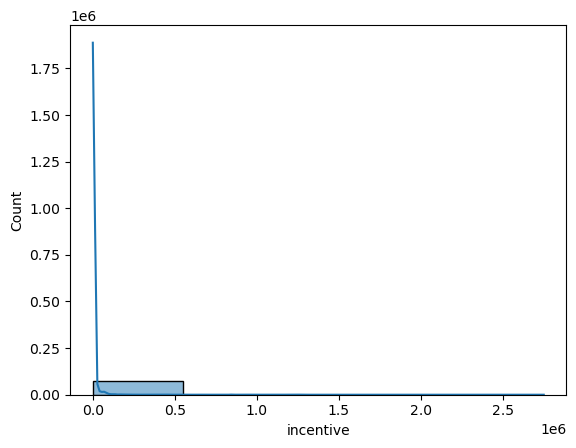

In [12]:
#Now checking for outliers in incentive
sns.histplot(df['incentive'], bins=5, kde = True) 

We have a similar situation with incentives, which have focussed more in the non-residential sector, since for the majority of projects have almost no monetary incentives.

In [13]:
#subsetting  the data to gain more insight into the residential values' group
df_residential= df[df['sector']=='Residential']

<AxesSubplot:xlabel='kw_dc', ylabel='Count'>

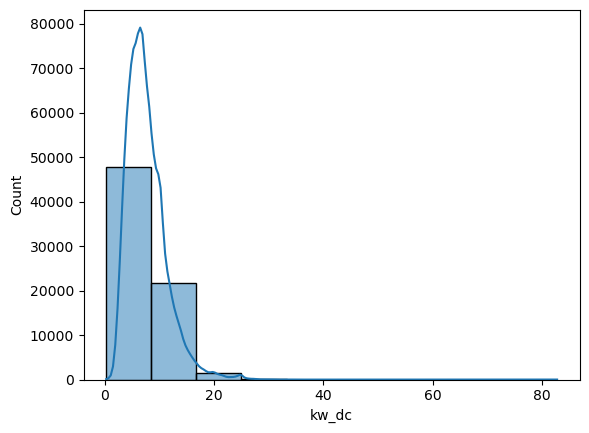

In [14]:
sns.histplot(df_residential['kw_dc'], bins=10, kde = True) #checking now the distribuition 

Within the residential sector, the distribuition is also skwewed to the right, with some outliers, but all these values make sense for Kwh values.

In [15]:
#repeat the same analysis for the non-residential sector
df_non_residential= df[df['sector']=='Non-Residential']

<AxesSubplot:xlabel='kw_dc', ylabel='Count'>

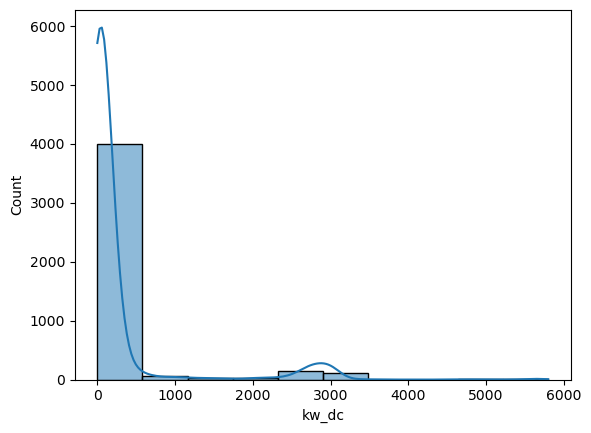

In [16]:
sns.histplot(df_non_residential['kw_dc'], bins=10, kde = True) #checking now the distribuition 

installations with 2000-3000KW are outliers but are also perfectly possible, they are large-scale solar PV installations, for commercial or industrial purposes

<AxesSubplot:xlabel='incentive', ylabel='Count'>

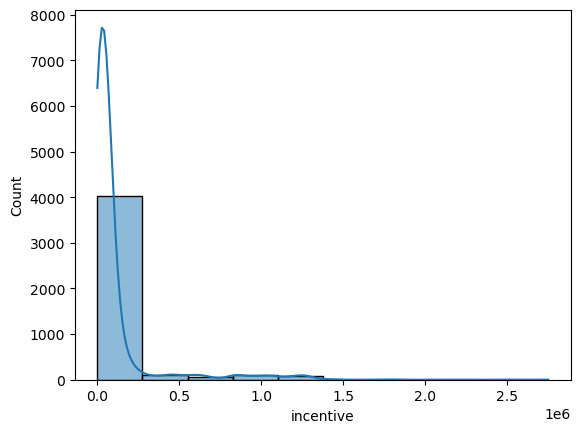

In [17]:
#checking for incentive
sns.histplot(df_non_residential['incentive'], bins=10, kde = True) #checking now the distribuition 

The distribution for incentive is much more frequent in the non-residential group, so it is likely incentives are mainly for the non-residential sector

Considering the outliers, we can create subsets of the dataframe that separate these two groups, based on installed capacity

In [18]:
# creating a new df that has only those values lower than 500, removing the outlier values of the large commercial/industry installations
df_sol_low = df[df['kw_dc'] <500]

In [19]:
df_sol_low.shape

(75166, 21)

In [20]:
df_sol_low.head()

,index,project_number,city,county,state,zip_code,sector,program_type,electric_utility,purchase_type,...,project_status,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,affordable_solar,community_distributed_generation,location_data
0,0,5137-49041,Maine,Broome,NY,13802,Residential,Residential/Small Commercial,NYS Electric and Gas,Lease,...,Complete,2.0,40.0,41800.00,6930.0,10.00,11738.0,False,False,"Maine, NY 13802\n(42.240938, -76.047937)"
1,1,5137-46019,Levittown,Nassau,NY,11756,Residential,Residential/Small Commercial,PSEG Long Island,Lease,...,Complete,1.0,28.0,30940.00,2520.0,7.00,8217.0,False,False,"Levittown, NY 11756\n(40.725845, -73.517198)"
2,2,5137-52151,Cortland,Cortland,NY,13045,Residential,Residential/Small Commercial,National Grid,Lease,...,Complete,2.0,49.0,48387.50,11025.0,12.25,14380.0,False,False,"Cortland, NY 13045\n(42.588691, -76.185061)"
3,3,5129-94109,Staten Island,Richmond,NY,10314,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,...,Complete,1.0,15.0,23509.54,2943.0,4.91,5758.0,False,False,"Staten Island, NY 10314\n(40.604049, -74.152798)"
4,4,5137-46454,Warwick,Orange,NY,10990,Residential,Residential/Small Commercial,Orange and Rockland Utilities,Lease,...,Complete,1.0,22.0,25283.00,5720.0,5.72,6714.0,False,False,"Warwick, NY 10990\n(41.263165, -74.365461)"


In [21]:
#create a new df that has only the higher values
df_sol_high = df[df['kw_dc'] > 500] 

In [22]:
df_sol_high.shape

(397, 21)

There are only 397 installations with an installed capacity higher than 500 kW

<AxesSubplot:xlabel='kw_dc', ylabel='Count'>

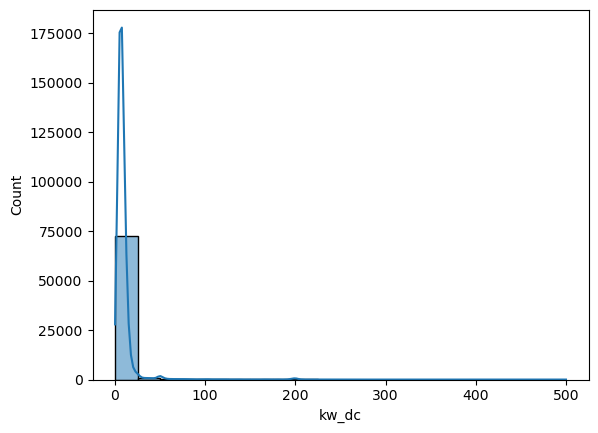

In [23]:
sns.histplot(df_sol_low['kw_dc'], bins=20, kde = True) #checking now the distribuition 

<AxesSubplot:xlabel='kw_dc', ylabel='Count'>

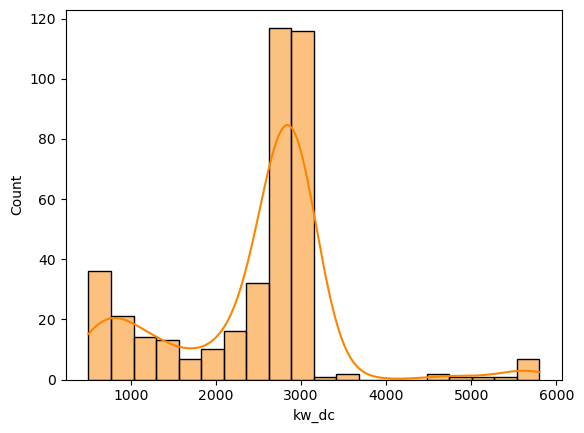

In [24]:
sns.histplot(df_sol_high['kw_dc'], color='#fb8500', bins=20, kde = True) #checking now the distribuition for the larger solar projects

In [25]:
#Creating and saving df_sol_low in a new pickle file for future analysis
df_sol_low.to_pickle(os.path.join(path, '02. Prepared data', 'solar_power_low.pkl'))

In [26]:
#Doing the same for df_sol_high
df_sol_high.to_pickle(os.path.join(path, '02. Prepared data', 'solar_power_high.pkl'))

### 3. New Variable for Installations by Size

In [27]:
#Creating a new categorical variable that groups installations per kw - with  >100 for small, =< to 100 and >500 for medium, and >500 for large
df.loc[df['kw_dc']<100,'installation_size']='Small Solar'

In [28]:
df.loc[(df['kw_dc']>=100)&(df['kw_dc']<=500),'installation_size']='Medium Solar'

In [29]:
df.loc[df['kw_dc']>500,'installation_size']='Large Solar'

In [30]:
df['installation_size'].value_counts(dropna=False)

Small Solar     74431
Medium Solar      736
Large Solar       397
Name: installation_size, dtype: int64

In [31]:
df.head()

,index,project_number,city,county,state,zip_code,sector,program_type,electric_utility,purchase_type,...,inverter_quantity,pv_quantity,project_cost,incentive,kw_dc,kwh_year,affordable_solar,community_distributed_generation,location_data,installation_size
0,0,5137-49041,Maine,Broome,NY,13802,Residential,Residential/Small Commercial,NYS Electric and Gas,Lease,...,2.0,40.0,41800.00,6930.0,10.00,11738.0,False,False,"Maine, NY 13802\n(42.240938, -76.047937)",Small Solar
1,1,5137-46019,Levittown,Nassau,NY,11756,Residential,Residential/Small Commercial,PSEG Long Island,Lease,...,1.0,28.0,30940.00,2520.0,7.00,8217.0,False,False,"Levittown, NY 11756\n(40.725845, -73.517198)",Small Solar
2,2,5137-52151,Cortland,Cortland,NY,13045,Residential,Residential/Small Commercial,National Grid,Lease,...,2.0,49.0,48387.50,11025.0,12.25,14380.0,False,False,"Cortland, NY 13045\n(42.588691, -76.185061)",Small Solar
3,3,5129-94109,Staten Island,Richmond,NY,10314,Residential,Residential/Small Commercial,Consolidated Edison,Purchase,...,1.0,15.0,23509.54,2943.0,4.91,5758.0,False,False,"Staten Island, NY 10314\n(40.604049, -74.152798)",Small Solar
4,4,5137-46454,Warwick,Orange,NY,10990,Residential,Residential/Small Commercial,Orange and Rockland Utilities,Lease,...,1.0,22.0,25283.00,5720.0,5.72,6714.0,False,False,"Warwick, NY 10990\n(41.263165, -74.365461)",Small Solar


In [32]:
#Saving the df with the new variable
df.to_pickle(os.path.join(path, '02. Prepared data', 'solar_power_new.pkl'))

### 4. Plotting a choropleth

In [33]:
#check datatype of location data
df.columns

Index(['index', 'project_number', 'city', 'county', 'state', 'zip_code',
       'sector', 'program_type', 'electric_utility', 'purchase_type',
       'date_application_received', 'project_status', 'inverter_quantity',
       'pv_quantity', 'project_cost', 'incentive', 'kw_dc', 'kwh_year',
       'affordable_solar', 'community_distributed_generation', 'location_data',
       'installation_size'],
      dtype='object')

In [34]:
#Create a df with the counties and kw_dc
data_to_plot = df_sol_low[['county','incentive']]
data_to_plot.head()

,county,incentive
0,Broome,6930.0
1,Nassau,2520.0
2,Cortland,11025.0
3,Richmond,2943.0
4,Orange,5720.0


In [40]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = county_geo, 
    data = data_to_plot,
    columns = ['county', 'incentive'],
    key_on = 'feature.properties.name', # after checking the json structure, this is where the KEY is located
    fill_color = 'YlGnBu', fill_opacity=0.9, line_opacity=0.2,
    legend_name = "Incentives for Solar PV").add_to(map)
folium.LayerControl().add_to(map)

map

Incentives are low for the majority of counties yet there are clear outliers in Buffalo and Northern counties, which indicates maybe these are installations for industry/commerce and non-residential. 

In [36]:
map.save('plot_data.html')

In [37]:
#Second map focussing on installed capacity
#Create a df with the counties and kw_dc
data_to_plot2 = df_sol_low[['county','kw_dc']]
data_to_plot2.head()

,county,kw_dc
0,Broome,10.00
1,Nassau,7.00
2,Cortland,12.25
3,Richmond,4.91
4,Orange,5.72


In [38]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = county_geo, 
    data = data_to_plot2,
    columns = ['county', 'kw_dc'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlGn', fill_opacity=0.9, line_opacity=0.1,
    legend_name = "Installed Capacity in NY State").add_to(map)
folium.LayerControl().add_to(map)

map

The majority of counties have installations with a capacity of 1 to 24KW which is expected in residential solar, there are some outliers in rural areas, which likely mean these installations are commercia/industrial and not residential. This also points to the relevance of comparing rural to urban regions in terms of incentives and installations.

In [39]:
map.save('plot2_data.html')

### 5. Insights for Analysis

This analysis does not directly answer any question, yet it enables insight into the strong correlation between most variables - i.e., incentives, and PV production. It supports the hypothesis that PV production is higher in counties with more incentives. Also, since these are mainly rural regions, it is raises the question of whether incentives are more focussed in rural regions, which are likely to have a higher potential for large-scale PV installations. 

This aspect leads to a new research question: Are incentives mainly attributed to projects in rural regions?